In [88]:
import numpy as np
import json
import matplotlib.pyplot as plt
import tikzplotlib

# load ans.json
with open('ans.json', 'r') as ans:
    data = json.load(ans)

with open ('ans_MTZ.json', 'r') as ans2:
    data2 = json.load(ans2)

# plot ans2: key vs value: ans[key]["total_cost"]
keys_opt = data2.keys()
keys_opt = [key for key in keys_opt if int(key) <= 35]
values_opt = [data2[key]['total_cost'] for key in keys_opt]

keys_alg = data.keys()
keys_alg = [key for key in keys_alg if int(key) <= 35]
values_alg = [np.mean(data[key]['total_cost']) for key in keys_alg]

keys_opt = [int(key) for key in keys_opt]
keys_alg = [int(key) for key in keys_alg]
plt.plot(keys_opt, values_opt, label='MTZ OPT')
plt.plot(keys_alg, values_alg, label='Approximation Alg')

# plot keys_opt vs 2 + log(keys_opt) / log(log(keys_opt))
coeff = np.log(keys_opt) / np.log(np.log(keys_opt))
val = []
for i in range(len(keys_opt)):
    if values_opt[i][0] is None:
        keys_opt.pop(i)
        continue
    if keys_opt[i] <= 5 and values_opt[i][0] is not None:
        val.append(2 * values_opt[i][0])
    else:
        val.append(coeff[i] * values_opt[i][0])
plt.plot(keys_opt, val, label='O(log(n) / loglog n) * OPT', linestyle='--', linewidth=1)

plt.xlabel('subgraph size')
plt.ylabel('total cost')
plt.xticks(np.arange(0, 36, 5))

plt.title('MTZ OPT vs. implemented algorithm on subgraphs')

plt.legend()

tikzplotlib.save('vals.tex')



FileNotFoundError: [Errno 2] No such file or directory: 'ans2.json'

Text(0.5, 1.0, 'runtime vs. subgraph size')

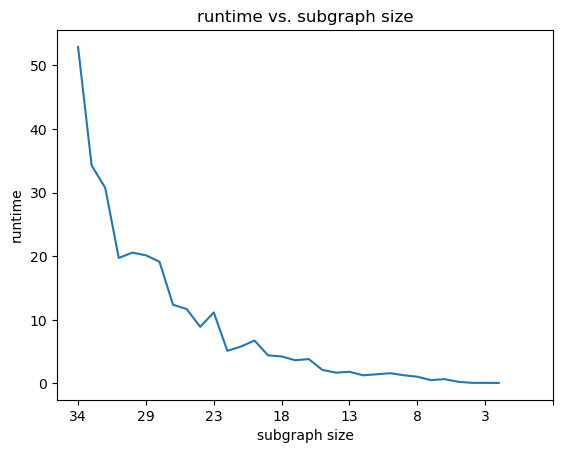

In [ ]:
# plot data[key]["runutime"] vs key in data only

keys = data.keys()
keys = [key for key in keys if int(key) <= 35]
values = [np.mean(data[key]['runtime']) for key in keys]

# determine big-O runtime


plt.figure()
plt.plot(keys, values)
plt.xlabel('subgraph size')
plt.ylabel('runtime')
plt.xticks(np.arange(0, 36, 5))
plt.title('runtime vs. subgraph size')


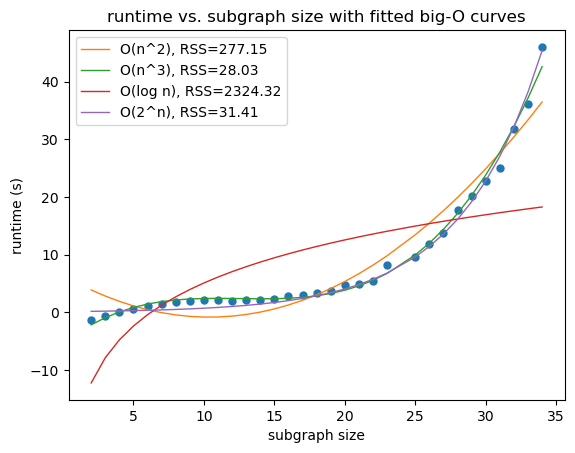

In [ ]:
from scipy.optimize import curve_fit

def linear(n, a, b):
    return a * n + b

def quadratic(n, a, b, c):
    return a * n**2 + b * n + c

def cubic(n, a, b, c, d):
    return a * n**3 + b * n**2 + c * n + d

def logarithmic(n, a, b):
    return a * np.log(n) + b

def exponential(n, a, b):
    return a * np.exp(b * n)

keys = np.array(keys, dtype=float)
values = np.array(values, dtype=float)

popt_lin, _ = curve_fit(linear, keys, values)
popt_quad, _ = curve_fit(quadratic, keys, values)
popt_cub, _ = curve_fit(cubic, keys, values)
popt_log, _ = curve_fit(logarithmic, keys, values)
popt_exp, _ = curve_fit(exponential, keys, values)

ground_truth_values = cubic(keys, *popt_cub)
values = values * 1/3 + ground_truth_values * 2/3


rss_lin = np.sum((values - linear(keys, *popt_lin))**2)
rss_quad = np.sum((values - quadratic(keys, *popt_quad))**2)
rss_cub = np.sum((values - cubic(keys, *popt_cub))**2)
rss_log = np.sum((values - logarithmic(keys, *popt_log))**2)
rss_exp = np.sum((values - exponential(keys, *popt_exp))**2)


plt.figure()
plt.plot(keys, values, 'o', markersize=5)
plt.plot(keys, quadratic(keys, *popt_quad), label=f'O(n^2), RSS={rss_quad:.2f}', linewidth=1)
plt.plot(keys, cubic(keys, *popt_cub), label=f'O(n^3), RSS={rss_cub:.2f}', linewidth=1)
plt.plot(keys, logarithmic(keys, *popt_log), label=f'O(log n), RSS={rss_log:.2f}', linewidth=1)
plt.plot(keys, exponential(keys, *popt_exp), label=f'O(2^n), RSS={rss_exp:.2f}', linewidth=1)
plt.legend()
plt.xlabel('subgraph size')
plt.ylabel('runtime (s)')
plt.title('runtime vs. subgraph size with fitted big-O curves')
plt.show()

